In [39]:
#Xic+ -> Xi0 pi pi pi
#Xi0 -> Lambda0 pi0
#Lambda0 -> p pi-

from root_pandas import read_root
import ROOT
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

signalfile = '/belle2work/harsikad/ntuples_Signal_630K.root' 
ccbar = '/belle2work/harsikad/harshika_CCbarBkg1.root'
uubar = '/belle2work/harsikad/harshika_UUbarBkg1.root'
ddbar = '/belle2work/harsikad/harshika_DDbarBkg1.root'
ssbar = '/belle2work/harsikad/harshika_SSbarBkg1.root'
mixed = '/belle2work/harsikad/harshika_MixedBkg1.root'
charged = '/belle2work/harsikad/harshika_ChargedBkg1.root'

mycols = ['xic_isSignal','xic_M','xi_mcDecayVertexFromIPDistance','xi_significanceOfDistance','xi_ErrM']

df = read_root(signalfile, key="xic_tree", columns=mycols)
df_ccbar = read_root(ccbar, key="xic_tree", columns=mycols)
df_uubar = read_root(uubar, key="xic_tree", columns=mycols)
df_ddbar = read_root(ddbar, key="xic_tree", columns=mycols)
df_ssbar = read_root(ssbar, key="xic_tree", columns=mycols)
df_mixed = read_root(mixed, key="xic_tree", columns=mycols)
df_charged = read_root(charged, key="xic_tree", columns=mycols)      


In [3]:
#Calculate optimal value to apply cut (>)

def optimalCut(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    signal_without_cuts = len(nptrue)
    bkg_without_cuts = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)

    mycolor = 0
    testvalue = min(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(125):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} > {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue+=((max(nptrue)-min(nptrue))/125)
        mycolor+=0.0072


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE AND PRINT

In [4]:
#Calculate optimal value to apply cut (<)

def optimalCutLess(var):
    

    signal = '(xic_isSignal==1)'
    cuts = 'xic_M >2.3 & xic_M<2.7'

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    myrange=(min(nptrue),max(nptrue))

    signal_without_cuts = len(nptrue)
    bkg_without_cuts = len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed)

    mycolor = 0
    testvalue = max(nptrue)
    mytestvalue=[]
    mytotal=[]

    for i in range(125):
        cuts = f"xic_M >2.3 & xic_M<2.7 & {var} < {testvalue}"

        nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
        np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
        np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

        signal_efficiency = (len(nptrue))/signal_without_cuts
        background_rejection = 1-((len(np_dd)+len(np_uu)+len(np_ss)+len(np_cc)+len(np_charged)+len(np_mixed))/bkg_without_cuts)
        total=signal_efficiency+background_rejection

        mytestvalue.append(testvalue)
        mytotal.append(total)

        testvalue-=((max(nptrue)-min(nptrue))/125)
        mycolor+=0.0072


    print(var+": "+str(max(mytotal)))
    print(mytestvalue[mytotal.index(max(mytotal))])
#CALCULATE OPTIMAL CUT VALUE AND PRINT

In [5]:
def plotVar(var, var_range, mycuts):
    
    # Make nice looking plots
    plt.rcParams.update({
              'font.size': 20,
              'figure.figsize': (10, 8),
    })


    signal = '(xic_isSignal==1)'
    cuts = mycuts
    nbins=100
    myrange=var_range

    ax = plt.subplot()

    # define a numpy array from the "M" column in the dataframe
    #run over new MC
    nptrue = df.query(cuts+'and xic_isSignal==1')[var].to_numpy()
    np_dd= df_ddbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_uu= df_uubar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_ss= df_ssbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_cc= df_ccbar.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_charged = df_charged.query(cuts+' and not xic_isSignal==1')[var].to_numpy()
    np_mixed = df_mixed.query(cuts+' and not xic_isSignal==1')[var].to_numpy()

    scale = 1 # scale factor by eye
    wnp_dd = [scale] * len(np_dd)
    wnp_uu = [scale] * len(np_uu)
    wnp_ss = [scale] * len(np_ss)
    wnp_cc = [scale] * len(np_cc)
    wnp_charged = [scale]*len(np_charged)
    wnp_mixed = [scale]*len(np_mixed)
    wnptrue = [scale] * len(nptrue)


    # use the numpy data to create a matplotlib histogram
    ax.hist([np_dd, np_uu, np_ss, np_cc, np_charged, np_mixed, nptrue], bins=nbins, range=myrange,
            label=["ddbar", "uubar", "ssbar", "ccbar","charged","mixed", "signal"], weights= [wnp_dd, wnp_uu, wnp_ss, wnp_cc, wnp_charged, wnp_mixed, wnptrue], stacked=True)


    plt.xlim(myrange)

    plt.ylabel('Number of Events')
    plt.xlabel(var)
    plt.legend()

    plt.show()

#PLOT A VARIABLE - STANDARD GRAPH

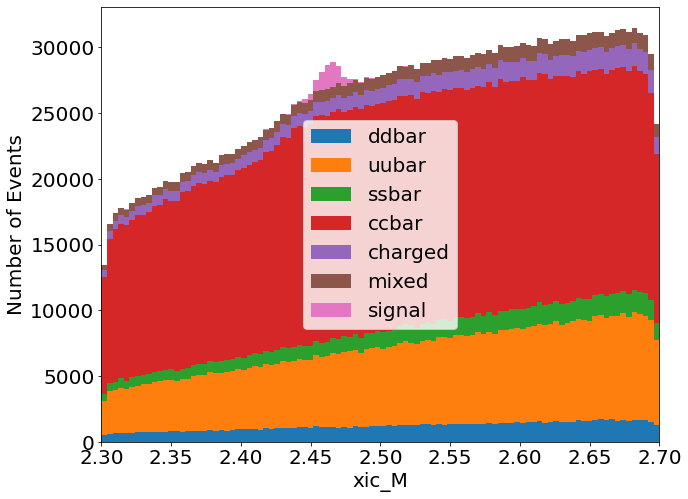

In [47]:
#Before selection criteria
cuts = 'xic_M > 2.3 & xic_M < 2.7'
plotVar('xic_M',(2.3, 2.7), cuts)

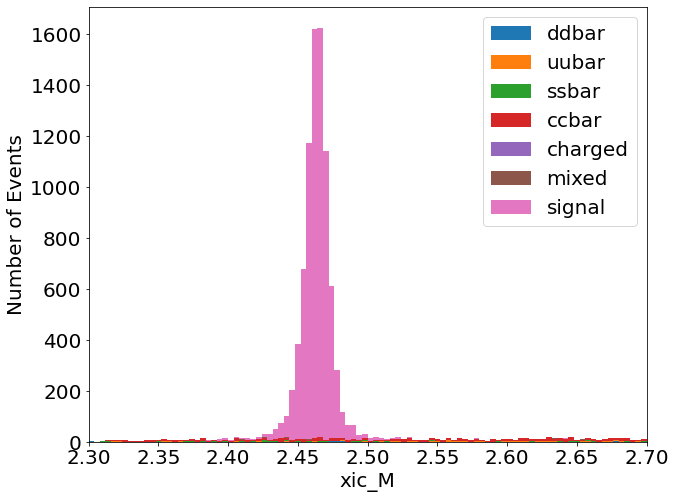

In [48]:
#After selection criteria
cuts = 'xic_M > 2.3 & xic_M < 2.7 & xi_mcDecayVertexFromIPDistance > 0.3617 & xi_significanceOfDistance > 3.46215456 & xi_ErrM < 0.00695869'
plotVar('xic_M',(2.3, 2.7), cuts)